In [1]:
import json
import pandas as pd
from tensorflow.keras.models import load_model
from src.plotting import plot_roc, get_nn_roc_vals
from tensorflow_addons.metrics import F1Score

In [2]:
roc_df_p = r'E:\Faculta\Anul2\Disertatie\cognitive-aether\datasets\final\ch_i\test\rice_flat\allSNR_rice_flat_ofdm.csv'
nn_cfg_path = r'E:/Faculta/Anul2/Disertatie/cognitive-aether/configs/train.json'
resid_path = r'E:\Faculta\Anul2\Disertatie\cognitive-aether\models_weights\resid_ch1\resid_ch1_epoch06_vloss0.25.hdf5'
seq_path = r'E:\Faculta\Anul2\Disertatie\cognitive-aether\models_weights\seq_ch1\seq_ch1_epoch06_vloss0.28.hdf5'

In [3]:
with open(nn_cfg_path) as json_file:
    model_cfg = json.load(json_file)

In [4]:
resid_model = load_model(resid_path,
                         custom_objects={"F1Score": F1Score})
seq_model = load_model(seq_path,
                       custom_objects={"F1Score": F1Score})

In [5]:
roc_df = pd.read_csv(roc_df_p)

In [6]:
nns_list = [('RESID NN', resid_model), ('SEQ NN', seq_model)]

4896 -5SNR_USER
4896 -5SNR_USER
4167 0SNR_USER
4167 0SNR_USER
4218 5SNR_USER
4218 5SNR_USER
(9062,) (9062, 1)
-5SNR RESID NN 0.9802674065105319
(9062,) (9062, 1)
0SNR RESID NN 0.9960607422677824
(9062,) (9062, 1)
5SNR RESID NN 0.9578517584711385
(9062,) (9062, 1)
-5SNR SEQ NN 0.9730188447798709
(9062,) (9062, 1)
0SNR SEQ NN 0.9998305120976219
(9062,) (9062, 1)
5SNR SEQ NN 0.9909211920349895


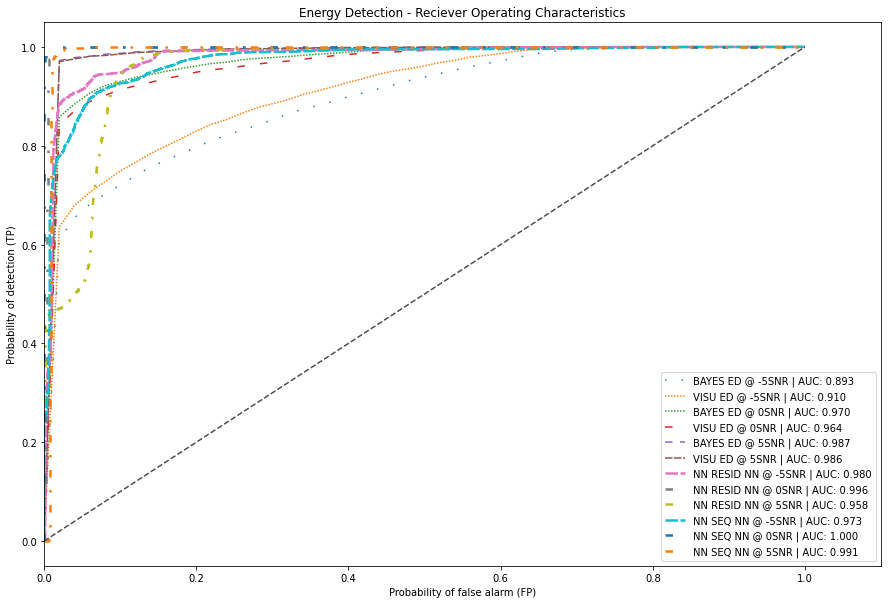

In [7]:
comp_sgns = ['-5SNR_RX_BAYES', '-5SNR_RX_VISU',
             '0SNR_RX_BAYES', '0SNR_RX_VISU',
             '5SNR_RX_BAYES', '5SNR_RX_VISU']

plot_roc(roc_test_df=roc_df[:(len(roc_df)//10)], sensing_window=3,
         compare_signals=comp_sgns, json_cfg=model_cfg, nn_model=nns_list)

# plot_roc(roc_test_df=roc_df[:(len(roc_df)//20)], sensing_window=3,
#          compare_signals=comp_sgns, json_cfg=model_cfg, nn_model=model2)